# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Pallavi Kollipara
#### Student ID: 4015344

Date: 12/04/2024

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* difflib
* seaborn
* matplotlib
* xml

## Introduction

The XML file s4015344_dataset1.xml needs to be converted to CSV using parsing methods. Subsequently, both graphical and non-graphical tools will be utilized to perform initial auditing of the dataset.

The dataset consists of fields such as Id, Title, Location, Company, ContractType, ContractTime, Category, Salary, OpenDate, CloseDate, and SourceName, covering the years 2012 and 2013. The data will be audited to identify errors, which will be listed in a CSV file "s4015344_errorlist.csv". Finally, the fixed "s4015344_dataset1" CSV will be generated.

## Importing libraries 

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import difflib
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1. Parsing Data

### 1.1. Examining and loading data

Investigate the "\s4015344_dataset1.xml" file to understand its content and organization. Utilize the parse() function to analyze the XML data and create a structured representation. Then, employ the getroot() method to confirm successful retrieval of the root element.

In [2]:
# Parse the XML file
xml_file = "s4015344_dataset1.xml"
tree = ET.parse(xml_file)
root = tree.getroot()
root.tag

'JobAds'

### 1.2 Parsing data into the required format

In [3]:
# Code to parse data

data = []

# Iterate the data for each job advertisement
for job_ad in root.findall('.//JobAd'):
    add_data = {
        'Id': job_ad.find('Id').text,
        'Title': job_ad.find('Title').text if job_ad.find('Title') is not None else 'non-specified',
        'Location': job_ad.find('Location').text if job_ad.find('Location') is not None else 'non-specified',
        'Company': job_ad.find('Company').text if job_ad.find('Company') is not None else 'non-specified',
        'ContractType': job_ad.find('ContractType').text if job_ad.find('ContractType') is not None else 'non-specified',
        'ContractTime': job_ad.find('ContractTime').text if job_ad.find('ContractTime') is not None else 'non-specified',
        'Category': job_ad.find('Category').text if job_ad.find('Category') is not None else None,
        'Salary': job_ad.find('Salary').text if job_ad.find('Salary') is not None else None,
        'OpenDate': job_ad.find('.//OpenDate').text if job_ad.find('.//OpenDate') is not None else None,
        'CloseDate': job_ad.find('.//CloseDate').text if job_ad.find('.//CloseDate') is not None else None
    }
    data.append(add_data)

# The SourceName is the same for all entries, we fetch it only once
source_name = root.find('.//SourceName').text if root.find('.//SourceName') is not None else 'non-specified'

# Add 'SourceName' to each dictionary entry
for entry in data:
    entry['SourceName'] = source_name

# Create DataFrame
df = pd.DataFrame(data)

# Display the head of the DataFrame to check the result
df.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69747285,Science Teacher Sundays,West London,Trust Education,part_time,N/A,Teaching Jobs,25400,20120917T150000,20121017T150000,cv-library.co.uk
1,69022397,IT Support/Rollout Engineer,Sheffield,Matchtech Group Plc,N/A,contract,IT Jobs,14400,20130927T000000,20131027T000000,cv-library.co.uk
2,69932721,Electronics Reliability Analysis Engineer,UK,Innovate Recruitment Ltd,N/A,permanent,Engineering Jobs,29000,20121115T120000,20130213T120000,cv-library.co.uk
3,67019364,Project / Planning Coordinator,Ely,i4 Recruitment,N/A,permanent,Engineering Jobs,21500,20120426T150000,20120625T150000,cv-library.co.uk
4,67903542,Solutions Architect CCNP CCIP CCIE,Reading,JAM Recruitment Ltd,N/A,permanent,IT Jobs,55000,20131219T150000,20140217T150000,cv-library.co.uk


In [4]:
df.shape

(50703, 11)

## Task 2. Auditing and cleansing the loaded data


In [5]:
# Code to audit data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50703 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50703 non-null  object
 1   Title         50703 non-null  object
 2   Location      50703 non-null  object
 3   Company       50703 non-null  object
 4   ContractType  50703 non-null  object
 5   ContractTime  50703 non-null  object
 6   Category      50703 non-null  object
 7   Salary        49939 non-null  object
 8   OpenDate      50703 non-null  object
 9   CloseDate     50703 non-null  object
 10  SourceName    50703 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [6]:
df.describe()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
count,50703,50703,50703,50703,50703,50703,50703,49939,50703,50703,50703
unique,50702,50700,489,8674,6,6,8,3467,2194,2416,1
top,69854693,Commercial Burner Engineer,UK,non-specified,non-specified,permanent,IT Jobs,35000,20120408T120000,20130420T000000,cv-library.co.uk
freq,2,2,7622,3379,15362,30324,13133,1718,42,38,50703


In [7]:
df.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69747285,Science Teacher Sundays,West London,Trust Education,part_time,N/A,Teaching Jobs,25400,20120917T150000,20121017T150000,cv-library.co.uk
1,69022397,IT Support/Rollout Engineer,Sheffield,Matchtech Group Plc,N/A,contract,IT Jobs,14400,20130927T000000,20131027T000000,cv-library.co.uk
2,69932721,Electronics Reliability Analysis Engineer,UK,Innovate Recruitment Ltd,N/A,permanent,Engineering Jobs,29000,20121115T120000,20130213T120000,cv-library.co.uk
3,67019364,Project / Planning Coordinator,Ely,i4 Recruitment,N/A,permanent,Engineering Jobs,21500,20120426T150000,20120625T150000,cv-library.co.uk
4,67903542,Solutions Architect CCNP CCIP CCIE,Reading,JAM Recruitment Ltd,N/A,permanent,IT Jobs,55000,20131219T150000,20140217T150000,cv-library.co.uk


In [8]:
df.isnull().sum()

Id                0
Title             0
Location          0
Company           0
ContractType      0
ContractTime      0
Category          0
Salary          764
OpenDate          0
CloseDate         0
SourceName        0
dtype: int64

### Error recorder

Create an error log named "erlist" DataFrame to log any encountered issues during the auditing procedure. Additionally, developed the function "updateErlist" to modify the erlist DataFrame accordingly.

In [9]:
itemlist = ['indexOfdf','Id','ColumnName', 'Orignal', 'Modified', 'ErrorType','Fixing']
erlist = pd.DataFrame(columns=itemlist)
erlist

,indexOfdf,Id,ColumnName,Orignal,Modified,ErrorType,Fixing


In [10]:
# update error list by attributes
def updateErlist(indexOfdf,Id, ColumnName, Orignal, Modified, ErrorType, Fixing):
    errItem=[indexOfdf,Id,ColumnName, Orignal, Modified, ErrorType,Fixing]
    erlist.loc[len(erlist)]=errItem

In [11]:
indices = df.index 
indices

RangeIndex(start=0, stop=50703, step=1)

## Checking for ID :

In this task, I first ensured that the "Id" column contained no null values and then converted it from an object data type to an integer type. Upon checking for duplicate values, I identified one. To resolve this, I compared the associated open dates and decided to keep the latest record. This process helps maintain data integrity and ensures that only the most recent information is retained.

In [12]:
non_digit_chars = df['Id'].apply(lambda x: re.findall(r'\D+', x))
non_digit_chars.astype('str').value_counts()

[]    50703
Name: Id, dtype: int64

In [13]:
df['Id']=df['Id'].astype(int)

In [14]:
updateErlist(42853, 69854693, 'Id', '69854693','', 'Duplicate', "dropped this record because of the duplicate data ")


In [15]:
# Code to fix the conflict
# check duplication
cols = ['Id'] 
duplicates = df[df.duplicated(cols,keep=False)]
print ("There are "+ str(len(duplicates)) + " duplicate records found")
duplicates.sort_values(by=cols).head(10)

There are 2 duplicate records found


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
42853,69854693,PRIMARY SUPPLY TEACHING STAFF Greater London ...,London,AER TEACHERS,part_time,contract,Teaching Jobs,31500,20130526T120000,20130625T120000,cv-library.co.uk
50677,69854693,Infrastructure Technician St Albans,St. Albans,Conrad Consulting,-,permanent,Engineering Jobs,33500,20120927T150000,20121226T150000,cv-library.co.uk


In [16]:
df = df.drop_duplicates(cols, keep='last')
df.shape

(50702, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50702 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50702 non-null  int64 
 1   Title         50702 non-null  object
 2   Location      50702 non-null  object
 3   Company       50702 non-null  object
 4   ContractType  50702 non-null  object
 5   ContractTime  50702 non-null  object
 6   Category      50702 non-null  object
 7   Salary        49938 non-null  object
 8   OpenDate      50702 non-null  object
 9   CloseDate     50702 non-null  object
 10  SourceName    50702 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB


## Checking for Location:

The "Location" column in the dataset contains various location names, but some entries have misspellings or inconsistencies. To address this issue, I utilized the difflib.get_close_matches function to find similar location names with a cutoff value of 0.85. This below code snippet searches for similar location names to 'manchaster' in the dataset and returns the closest match with a similarity score above 0.85. Similarly, I performed this process for other misspelled locations such as 'leads', 'oxfords', 'livepool', and 'cembridge'. Paralelly I am updating the error table.

In [18]:
df['Location'].fillna('non-specified', inplace=True)
df['Location']= df['Location'].str.lower()

In [19]:
df['Location'].value_counts()

uk                   7622
london               6608
south east london    2687
the city             1129
central london        830
                     ... 
leads                   2
oxfords                 2
livepool                1
cembridge               1
manchaster              1
Name: Location, Length: 484, dtype: int64

In [20]:
difflib.get_close_matches('manchaster',set(df['Location']).difference(['manchaster']), n = 1,cutoff=0.85) 

['manchester']

In [21]:
misspelled_rows = df[df['Location'].str.contains('manchaster', case=False)]
misspelled_id = misspelled_rows['Id'].values[0] if not misspelled_rows.empty else None
misspelled_index = misspelled_rows.index[0]
updateErlist(misspelled_index, misspelled_id,'Location', 'manchaster', 'manchester', 'Misspelling','changed manchaster to manchester') 

In [22]:
difflib.get_close_matches('cembridge',set(df['Location']).difference(['cembridge']), n = 1,cutoff=0.85) 

['cambridge']

In [23]:

misspelled_rows = df[df['Location'].str.contains('cembridge', case=False)]
misspelled_id = misspelled_rows['Id'].values[0] if not misspelled_rows.empty else None
misspelled_index = misspelled_rows.index[0]
updateErlist(misspelled_index, misspelled_id,'Location', 'cembridge', 'cambridge', 'Misspelling','changed cembridge to cambridge') 

In [24]:
difflib.get_close_matches('livepool',set(df['Location']).difference(['livepool']), n = 1,cutoff=0.85) 

['liverpool']

In [25]:

misspelled_rows = df[df['Location'].str.contains('livepool', case=False)]
misspelled_id = misspelled_rows['Id'].values[0] if not misspelled_rows.empty else None
misspelled_index = misspelled_rows.index[0]
updateErlist(misspelled_index, misspelled_id,'Location', 'livepool', 'liverpool', 'Misspelling','changed cembridge to cambridge') 

In [26]:
difflib.get_close_matches('oxfords',set(df['Location']).difference(['oxfords']), n = 1,cutoff=0.85) 

['oxford']

In [27]:

misspelled_rows = df[df['Location'].str.contains('oxfords', case=False)]
misspelled_id = misspelled_rows['Id'].values[0] if not misspelled_rows.empty else None
misspelled_index = misspelled_rows.index[0]
updateErlist(misspelled_index, misspelled_id,'Location', 'oxfords', 'oxford', 'Misspelling','changed cembridge to cambridge') 

In [28]:
difflib.get_close_matches('leads',set(df['Location']).difference(['leads']), n = 1,cutoff=0.80) 

['leeds']

In [29]:

misspelled_rows = df[df['Location'].str.contains('leads', case=False)]
misspelled_id = misspelled_rows['Id'].values[0] if not misspelled_rows.empty else None
misspelled_index = misspelled_rows.index[0]
updateErlist(misspelled_index, misspelled_id,'Location', 'leads', 'leeds', 'Misspelling','changed cembridge to cambridge') 

In [30]:
replace_dict = {'manchaster':'manchester', 'cembridge':'cambridge','livepool':'liverpool','oxfords':'oxford','leads':'leeds'}
df['Location'].replace(replace_dict,inplace=True)
df['Location'].value_counts()

uk                   7622
london               6608
south east london    2687
the city             1129
central london        830
                     ... 
grimsby                 9
chipping campden        8
oldbury                 8
petersfield             8
north finchley          7
Name: Location, Length: 479, dtype: int64

## Checking for Title:

There are no errors in the title

In [31]:
df['Title'].fillna('non-specified', inplace=True)
df['Title'].unique()

array(['Science Teacher  Sundays', 'IT Support/Rollout Engineer',
       'Electronics Reliability Analysis Engineer', ...,
       'Graduate Engineer (Water industry)',
       'Health & Social Care Tutor/Assessor  Bristol',
       'Head of Estates Maintenance'], dtype=object)

In [32]:
df['Title']= df['Title'].str.lower()
df['Title'].value_counts()

finance business partner                                    2
commercial burner engineer                                  2
system tester  join a leading fund manager  ****k, essex    2
calibration repair engineer                                 1
graduate developer  consultant java sql banking city        1
                                                           ..
staff nurse  dorking  dorking                               1
qualified nurses  exeter and plymouth  exeter               1
community nurse  leicester                                  1
deputy home manager rgn  preston                            1
head of estates maintenance                                 1
Name: Title, Length: 50699, dtype: int64

## Checking for Company:

I addressed the presence of space (' '), dot ('.'), n/a and hyphen ('-') values in the "Company" column by replacing them with "non-specified".

In [33]:
df['Company'].unique()

array(['Trust Education', 'Matchtech Group Plc',
       'Innovate Recruitment Ltd', ..., 'Proxime Ltd', 'Hays ',
       'Pursuit Training Ltd'], dtype=object)

In [34]:
pattern = r'^[\s.-]*$|n/a'
matched_rows = df[df['Company'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['Company']

# Print the indices and corresponding 'Id' values
for ind, Id, Or_col in zip(matched_indices, matched_ids,matched_values):
    #print("Index:", index, "Id:", id_value)
    updateErlist(ind, Id,'Company', Or_col, 'non-specified', 'Inconsistency',"replacing all inconsistant values") 

In [35]:
df['Company'] = df['Company'].replace(pattern, 'non-specified', regex=True)

In [36]:
# Fill NaN values with 'non-specified'
df['Company']= df['Company'].str.lower()
df['Company'].value_counts()

non-specified                5164
ukstaffsearch                 434
randstad                      369
cvbrowser                     309
matchtech group plc.          230
                             ... 
d p connect                     1
scr                             1
the best connection group       1
university of leeds             1
pursuit training ltd            1
Name: Company, Length: 8437, dtype: int64

In [37]:
erlist.head()

,indexOfdf,Id,ColumnName,Orignal,Modified,ErrorType,Fixing
0,42853,69854693,Id,69854693,,Duplicate,dropped this record because of the duplicate d...
1,36913,46635529,Location,manchaster,manchester,Misspelling,changed manchaster to manchester
2,351,69082675,Location,cembridge,cambridge,Misspelling,changed cembridge to cambridge
3,17387,71091982,Location,livepool,liverpool,Misspelling,changed cembridge to cambridge
4,242,66012745,Location,oxfords,oxford,Misspelling,changed cembridge to cambridge


## Checking for ContractType

I recorded the errors encountered in the "ContractType" column, which included blank values, hyphens, and "N/A" entries. Following the guidelines mentioned in the assignment PDF to maintain only "full_time", "part_time", and "non-specified" values, I updated the contract types accordingly using an array and lambda function.

In [38]:
df['ContractType'].unique()

array(['part_time', 'N/A', '-', 'full_time', ' ', 'non-specified'],
      dtype=object)

In [39]:
pattern = r'^[\s-]*$|N/A'
matched_rows = df[df['ContractType'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['ContractType']

# Print the indices and corresponding 'Id' values
for ind, Id, Or_col in zip(matched_indices, matched_ids,matched_values):
    #print("Index:", index, "Id:", id_value)
    updateErlist(ind, Id,'ContractType', Or_col, 'non-specified', 'Inconsistency',"replacing all inconsistant values") 

In [40]:
# Validate domain values
valid_contract_types = ['full_time', 'part_time', 'non-specified']
df['ContractType'] = df['ContractType'].apply(lambda x: x if x in valid_contract_types else 'non-specified')

In [41]:
df['ContractType'].value_counts()

non-specified    37436
full_time        11752
part_time         1514
Name: ContractType, dtype: int64

## Checking for ContractTime

I recorded the errors encountered in the "ContractTime" column, which included blank values, hyphens, and "N/A" entries. Following the guidelines mentioned in the assignment PDF to maintain only "contract", "permanent", and "non-specified" values, I updated the contract time accordingly using an array and lambda function.

In [42]:
df['ContractTime'].unique()

array(['N/A', 'contract', 'permanent', ' ', 'non-specified', '-'],
      dtype=object)

In [43]:
pattern = r'^[\s-]*$|N/A'
matched_rows = df[df['ContractTime'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['ContractTime']

# Print the indices and corresponding 'Id' values
for ind, Id, Or_col in zip(matched_indices, matched_ids,matched_values):
    #print("Index:", index, "Id:", id_value)
    updateErlist(ind, Id,'ContractTime', Or_col, 'non-specified', 'Inconsistency',"replacing all inconsistant values") 

In [44]:
# Validate domain values
valid_contract_times = ['permanent', 'contract', 'non-specified']
df['ContractTime'] = df['ContractTime'].apply(lambda x: x if x in valid_contract_times else 'non-specified')


In [45]:
df['ContractType'].value_counts()

non-specified    37436
full_time        11752
part_time         1514
Name: ContractType, dtype: int64

## Checking for the Category

The "Category" column does not contain any errors.

In [46]:
df['Category'].unique()

array(['Teaching Jobs', 'IT Jobs', 'Engineering Jobs', 'Sales Jobs',
       'Healthcare & Nursing Jobs', 'PR, Advertising & Marketing Jobs',
       'Hospitality & Catering Jobs', 'Accounting & Finance Jobs'],
      dtype=object)

## Checking for Salary

There are various inconsistencies in the "Salary" column, including different formats such as /year, pa, K, and hourly rates. To standardize this, I removed the 'K' character and multiplied the value by 1000. For example, if the value was '34K', I changed it to '34000'. Then, I created a loop to update all the error values accordingly.

In [47]:
df['Salary'] = df['Salary'].astype(str)

In [48]:
non_digit_chars = df['Salary'].apply(lambda x: re.findall(r'\D+', x))
non_digit_chars.astype('str').value_counts()

[]                    47684
['None']                764
['N/A']                 685
['.']                   405
[' ']                   380
['-']                   329
[' - ']                 100
[' to ']                100
['/year']               100
[' pa']                 100
['K']                    50
['.', ' per hour']        3
['.', ' p/h']             2
Name: Salary, dtype: int64

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:


pattern = r'(\d+)K'
matched_rows = df[df['Salary'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['Salary']

# Print the indices and corresponding 'Id' values
for ind, Id, Or_col in zip(matched_indices, matched_ids, matched_values):
    # Apply the regex pattern to the Or_col string directly
    updated_value = re.sub(pattern, lambda x: str(int(x.group(1)) * 1000), Or_col)
    updateErlist(ind, Id, 'Salary', Or_col, updated_value, 'Inconsistency', "Removed K and multiplied with 1000")


In [51]:
df['Salary'] = df['Salary'].str.replace(r'(\d+)K', lambda x: str(int(x.group(1)) * 1000), regex=True)


I followed a similar approach to handle values containing '-' and 'to'. I replaced these values with the average of the two salaries. For example, if the salary range was '23000 - 24000', I calculated the average of 23000 and 24000 and replaced it with the average value. Then, I updated the error log accordingly.

In [52]:
pattern = r'(\d+)\s?to\s?(\d+)'
matched_rows = df[df['Salary'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['Salary']

for ind, Id, Or_col in zip(matched_indices, matched_ids, matched_values):

    updated_value = re.sub(pattern, lambda x: str((float(x.group(1)) + float(x.group(2))) / 2), Or_col)
    updateErlist(ind, Id, 'Salary', Or_col, updated_value, 'Inconsistency', "removed to and replaced with the average of both")


In [53]:
pattern = r'(\d+)\s?-\s?(\d+)'
matched_rows = df[df['Salary'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['Salary']

for ind, Id, Or_col in zip(matched_indices, matched_ids, matched_values):

    updated_value = re.sub(pattern, lambda x: str((float(x.group(1)) + float(x.group(2))) / 2), Or_col)
    updateErlist(ind, Id, 'Salary', Or_col, updated_value, 'Inconsistency', "removed - and replaced with the average of both")


Here in the below code we are removing certain elements like "/year" and "pa" from some data, extracting the values, and then updating an error list with the rewritten data. 

In [54]:
pattern = r'(\d+)(?: pa|[/\\][yY]ear)'
matched_rows = df[df['Salary'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['Salary']

for ind, Id, Or_col in zip(matched_indices, matched_ids, matched_values):

    updated_value = re.sub(pattern, lambda x: str(x.group(1)), Or_col)
    updateErlist(ind, Id, 'Salary', Or_col, updated_value, 'Inconsistency', "removed the /year or pa and fetching the numeric value")



I've identified some records containing "per hour" or "p/h" patterns. From these, I've extracted the numeric values, converted them into yearly salaries, and then made updates to the error list accordingly.

In [55]:
pattern = r'(\d+\.?\d*)(?: p.{1,4}h.*)'
matched_rows = df[df['Salary'].str.contains(pattern, case=False, na=False)]
matched_indices = matched_rows.index
matched_ids = matched_rows['Id']
matched_values = matched_rows['Salary']

for ind, Id, Or_col in zip(matched_indices, matched_ids, matched_values):

    updated_value = re.sub(pattern, lambda x: str(float(x.group(1))*40*52), Or_col)
    updateErlist(ind, Id, 'Salary', Or_col, updated_value, 'Inconsistency', "converted per hour to per year")


In [56]:
non_digit_chars = df['Salary'].apply(lambda x: re.findall(r'\D+', x))
non_digit_chars.astype('str').value_counts()

[]                    47734
['None']                764
['N/A']                 685
['.']                   405
[' ']                   380
['-']                   329
[' - ']                 100
[' to ']                100
['/year']               100
[' pa']                 100
['.', ' per hour']        3
['.', ' p/h']             2
Name: Salary, dtype: int64

In [57]:
# define a function to deal with all cases
import numpy as np
def normalised(sal_string):
    # case 1, extract num in annual salary strings with format num-num
    result = re.fullmatch(r'(\d+)\s?to\s?(\d+)', sal_string)
    if result:
        return (float(result.group(1))+float(result.group(2)))/2
    
    # case 2, extract num in annual salary strings with other format
    result = re.fullmatch(r'(\d+)(?: pa|[/\\][yY]ear)?', sal_string)
    if result:
        return result.group(1)
    
    # case 3, extract num in strings with hour rate/salary
    result = re.fullmatch(r'(\d+\.?\d*)(?: p.{1,4}h.*)', sal_string)
    if result:
        return float(result.group(1))*40*52
    #case4
    result = re.fullmatch(r'(\d+\.?\d*)\s?-\s?(\d+\.?\d*)', sal_string)
    if result:
        return (float(result.group(1))+float(result.group(2)))/2

In [58]:
df['Salary'] = df['Salary'].apply(lambda x: normalised(x))

## Outliers


In [59]:
df['Salary'] = df['Salary'].astype(float)

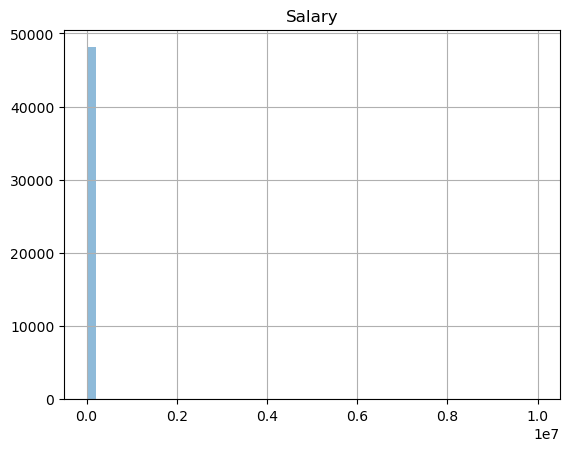

In [60]:
df.hist('Salary', bins=50, alpha=0.5)
plt.show()

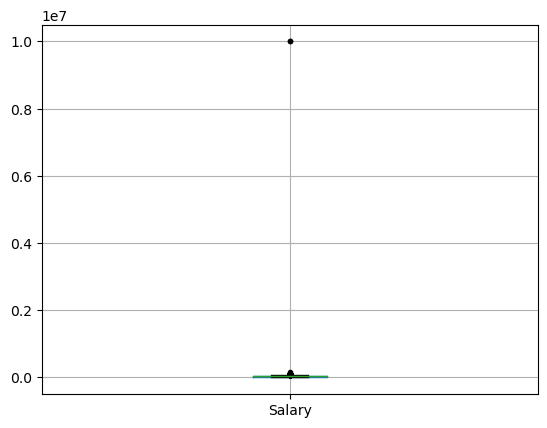

In [61]:
_,bp = df.boxplot(column='Salary',sym='k.',return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]] # extract the outlier values

In [62]:
outliers

[array([84000.0, 90000.0, 85000.0, ..., 75000.0, 85000.0, 90000.0],
       dtype=object)]

In [63]:
df.Salary.value_counts() # check the domain value of the bedrooms column

35000.0    1749
30000.0    1697
40000.0    1550
45000.0    1368
32500.0    1340
           ... 
26895.0       1
48192.0       1
20050.0       1
24591.0       1
53520.0       1
Name: Salary, Length: 3093, dtype: int64

<Axes: title={'center': 'Scatter plot'}, xlabel='Id', ylabel='Salary'>

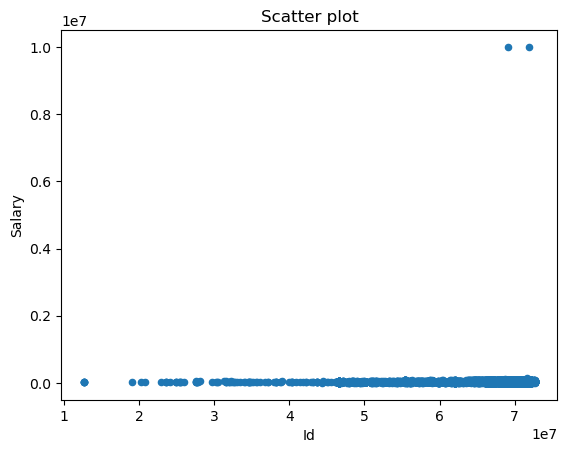

In [64]:
df.plot.scatter(x='Id', y='Salary', title= "Scatter plot") # plot a scatter plot to see the correlation between sqft_living and bedrooms

In [65]:
df['Salary'] = df['Salary'].astype(str)

# Apply regex pattern to extract non-digit characters
lastcheck = df['Salary'].apply(lambda x: re.findall(r'\D+', x))

# Convert the result to string and get value counts
lastcheck.astype('str').value_counts()

['.']      48139
['nan']     2563
Name: Salary, dtype: int64

In [66]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce').round(2)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50702 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            50702 non-null  int64  
 1   Title         50702 non-null  object 
 2   Location      50702 non-null  object 
 3   Company       50702 non-null  object 
 4   ContractType  50702 non-null  object 
 5   ContractTime  50702 non-null  object 
 6   Category      50702 non-null  object 
 7   Salary        48139 non-null  float64
 8   OpenDate      50702 non-null  object 
 9   CloseDate     50702 non-null  object 
 10  SourceName    50702 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


## Handle null values using linear regressions

In [68]:
df.isnull().sum()

Id                 0
Title              0
Location           0
Company            0
ContractType       0
ContractTime       0
Category           0
Salary          2563
OpenDate           0
CloseDate          0
SourceName         0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50702 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            50702 non-null  int64  
 1   Title         50702 non-null  object 
 2   Location      50702 non-null  object 
 3   Company       50702 non-null  object 
 4   ContractType  50702 non-null  object 
 5   ContractTime  50702 non-null  object 
 6   Category      50702 non-null  object 
 7   Salary        48139 non-null  float64
 8   OpenDate      50702 non-null  object 
 9   CloseDate     50702 non-null  object 
 10  SourceName    50702 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


There are 764 missing values in the Salary column.So let's impute the missing values for the Salary column using linear regression.

In [70]:

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(13,8))
    colormap=sns.diverging_palette(100,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)

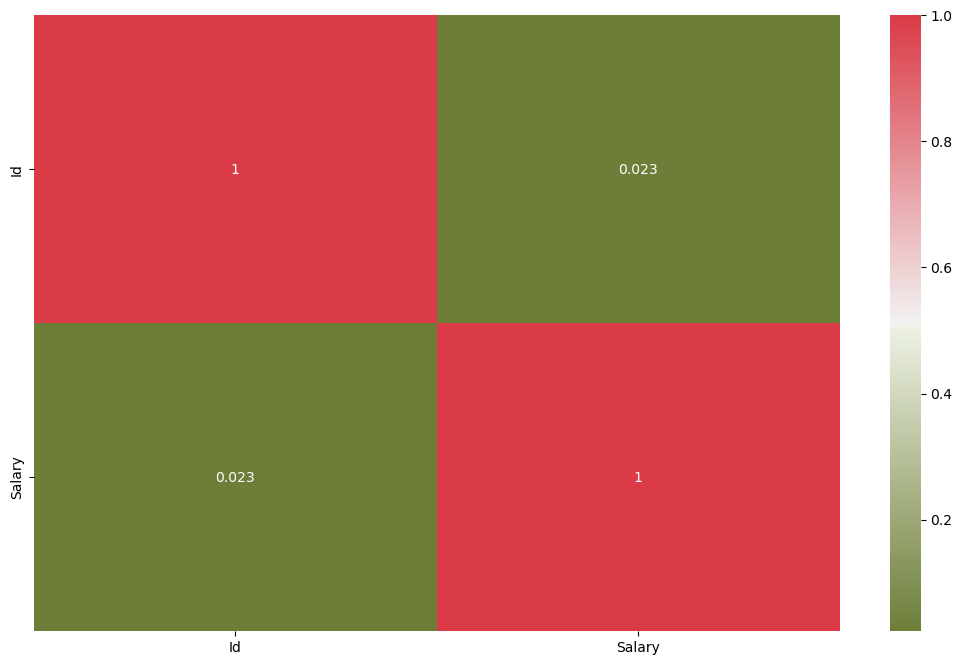

In [71]:
correlation_heatmap(df)
plt.show()

In [72]:
df_missing = df.loc[df.isnull().any(axis=1), df.isnull().any()]
df_missing

,Salary
14,NaN
26,NaN
44,NaN
70,NaN
161,NaN
...,...
50553,NaN
50584,NaN
50635,NaN
50651,NaN


In [73]:
# getting the indices that contains missing values 
df_missing.index

Int64Index([   14,    26,    44,    70,   161,   163,   164,   242,   275,
              294,
            ...
            50544, 50545, 50546, 50547, 50548, 50553, 50584, 50635, 50651,
            50681],
           dtype='int64', length=2563)

In [74]:
# create another dataframe without missing values to build the model
df_no_nan = df.dropna(axis=0)
salary_list = df_no_nan.Salary.unique().tolist()
salary_list

[25400.0,
 14400.0,
 29000.0,
 21500.0,
 55000.0,
 24000.0,
 32500.0,
 40500.0,
 32400.0,
 42500.0,
 21000.0,
 28875.0,
 41500.0,
 26000.0,
 41000.0,
 27500.0,
 33000.0,
 30000.0,
 22500.0,
 27000.0,
 47500.0,
 48500.0,
 23040.0,
 33500.0,
 25000.0,
 60000.0,
 19000.0,
 28000.0,
 20160.0,
 23000.0,
 26052.0,
 14792.0,
 13440.0,
 38500.0,
 29500.0,
 70000.0,
 84000.0,
 35000.0,
 17250.0,
 40000.0,
 45000.0,
 25920.0,
 20000.0,
 57500.0,
 39000.0,
 33600.0,
 15000.0,
 90000.0,
 18240.0,
 25800.0,
 17280.0,
 26500.0,
 42000.0,
 38000.0,
 18000.0,
 17500.0,
 57600.0,
 13600.0,
 32821.0,
 37000.0,
 23500.0,
 21120.0,
 30500.0,
 20200.0,
 46549.0,
 24600.0,
 32000.0,
 22080.0,
 44000.0,
 43000.0,
 37500.0,
 19200.0,
 14000.0,
 28800.0,
 39500.0,
 45120.0,
 85000.0,
 17750.0,
 43200.0,
 20727.0,
 15360.0,
 17400.0,
 15250.0,
 17000.0,
 50000.0,
 26400.0,
 34560.0,
 34500.0,
 22716.0,
 20500.0,
 56640.0,
 52800.0,
 15500.0,
 43500.0,
 18720.0,
 29750.0,
 23750.0,
 42240.0,
 40357.0,
 13200.0,


In [75]:
from sklearn import linear_model
# bulid a linear regression model 
cols = ['Id']
x_train = df_no_nan[cols]
y_train = df_no_nan['Salary']
regr = linear_model.LinearRegression()

regr.fit(x_train,y_train) # build the model

LinearRegression()

## null vlaues input for error table

In [76]:
#error update
updateErlist('All', 'All', 'Salary', 'Null','New predicted values', 'Missing values', "columns having Null values, I have done linear regression and fitted all the missing values")


In [77]:
def predict_bath(x):
    x_predict = regr.predict([x]) # expected 2D array as input
    return min(salary_list, key=lambda y:abs(y-x_predict)) # return the nearest bathroom value

In [78]:

# impute the missing records
df.loc[df_missing.index,'Salary'] = \
df.loc[df_missing.index].apply(lambda row: predict_bath(row[cols]), axis = 1)

In [79]:
df.loc[df_missing.index,'Salary']

14       34920.0
26       33386.0
44       33995.0
70       35520.0
161      33980.0
          ...   
50553    35612.0
50584    34800.0
50635    35598.0
50651    35460.0
50681    35078.0
Name: Salary, Length: 2563, dtype: float64

In [80]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce').round(2)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50702 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            50702 non-null  int64  
 1   Title         50702 non-null  object 
 2   Location      50702 non-null  object 
 3   Company       50702 non-null  object 
 4   ContractType  50702 non-null  object 
 5   ContractTime  50702 non-null  object 
 6   Category      50702 non-null  object 
 7   Salary        50702 non-null  float64
 8   OpenDate      50702 non-null  object 
 9   CloseDate     50702 non-null  object 
 10  SourceName    50702 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 6.7+ MB


## Checking for open and close date

This code ensures that both the 'OpenDate' and 'CloseDate' columns are converted to datetime format, checks the integrity constraint to ensure that the close date is greater than the open date, and handles null values in both columns by replacing them with a default date, which is set to January 1, 2000.

In [82]:
# Define a function to convert date strings to the desired format
def convert_to_datetime(date_str):
    # Define regex pattern to match both formats
    pattern = r'(\d{4})(\d{2})(\d{2})T(\d{2})(\d{2})(\d{2})'
    
    # Check if the date string matches any of the patterns
    match = re.match(pattern, date_str)
    if match:
        # Extract year, month, day, hour, minute, and second
        year, month, day, hour, minute, second = match.groups()
        
        # Reformat the date string
        return f"{year}-{month}-{day} {hour}:{minute}:{second}"
    else:
        # If no match, return None
        return None

# Apply the function to the 'OpenDate' column
df['OpenDate'] = df['OpenDate'].apply(convert_to_datetime)
df['CloseDate'] = df['CloseDate'].apply(convert_to_datetime)

# Print the DataFrame to verify the changes
df.head()


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69747285,science teacher sundays,west london,trust education,part_time,non-specified,Teaching Jobs,25400.0,2012-09-17 15:00:00,2012-10-17 15:00:00,cv-library.co.uk
1,69022397,it support/rollout engineer,sheffield,matchtech group plc,non-specified,contract,IT Jobs,14400.0,2013-09-27 00:00:00,2013-10-27 00:00:00,cv-library.co.uk
2,69932721,electronics reliability analysis engineer,uk,innovate recruitment ltd,non-specified,permanent,Engineering Jobs,29000.0,2012-11-15 12:00:00,2013-02-13 12:00:00,cv-library.co.uk
3,67019364,project / planning coordinator,ely,i4 recruitment,non-specified,permanent,Engineering Jobs,21500.0,2012-04-26 15:00:00,2012-06-25 15:00:00,cv-library.co.uk
4,67903542,solutions architect ccnp ccip ccie,reading,jam recruitment ltd,non-specified,permanent,IT Jobs,55000.0,2013-12-19 15:00:00,2014-02-17 15:00:00,cv-library.co.uk


In [83]:
#error update
updateErlist(47819, 70532534, 'OpenDate', '2013-14-06 15:00:00','', 'integrity constraint', "dropped these records because OpenDate has month as 14 ")


In [84]:
# Convert 'OpenDate' and 'CloseDate' columns to datetime dtype if they are not already
df['OpenDate'] = pd.to_datetime(df['OpenDate'], errors='coerce')
df['CloseDate'] = pd.to_datetime(df['CloseDate'], errors='coerce')

In [85]:
month_greater_than_12 = df[(df['OpenDate'].dt.month > 12) | (df['CloseDate'].dt.month > 12)]

# Display the rows where month is greater than 12
print(month_greater_than_12)

Empty DataFrame
Columns: [Id, Title, Location, Company, ContractType, ContractTime, Category, Salary, OpenDate, CloseDate, SourceName]
Index: []


In [86]:
# Check the integrity constraint and drop the rows where open date is after close date
violated_constraint = df[df['OpenDate'] >= df['CloseDate']]
if not violated_constraint.empty:
    print("Integrity constraint violated for the following rows:")

Integrity constraint violated for the following rows:


In [87]:
violated_constraint.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
3572,68218504,wind turbine engineer south east offshore / ...,south east england,hinson may consulting,non-specified,permanent,Engineering Jobs,33500.0,2012-07-03 15:00:00,2012-04-04 15:00:00,cv-library.co.uk
33385,71199441,design engineer mobile construction plant,derbyshire,vebro,non-specified,permanent,"PR, Advertising & Marketing Jobs",35000.0,2012-10-24 00:00:00,2012-07-26 00:00:00,cv-library.co.uk
35735,67959549,care home manager york,york,non-specified,non-specified,non-specified,Healthcare & Nursing Jobs,37500.0,2012-05-12 15:00:00,2012-03-13 15:00:00,cv-library.co.uk
36576,58728121,"rnld/rmn nurse, derby **** p/h",derbyshire,non-specified,non-specified,non-specified,Healthcare & Nursing Jobs,24960.0,2013-08-24 12:00:00,2013-08-10 12:00:00,cv-library.co.uk
43891,71602656,ophthalmic clinical nurse / technician reading,reading,london4jobs,full_time,permanent,Engineering Jobs,26000.0,2013-06-19 12:00:00,2013-04-20 12:00:00,cv-library.co.uk


In [88]:
updateErlist(3572, 68218504, 'OpenDate,CloseDate', '2012-07-03 15:00:00,2012-04-04 15:00:00','', 'integrity constraint', "dropped these records because OpenDate is greater than CloseDate")
updateErlist(33385, 71199441, 'OpenDate,CloseDate', '2012-10-24 00:00:00,2012-07-26 00:00:00','', 'integrity constraint', "dropped these records because OpenDate is greater than CloseDate")
updateErlist(35735, 67959549, 'OpenDate,CloseDate', '2012-05-12 15:00:00,2012-03-13 15:00:00','', 'integrity constraint', "dropped these records because OpenDate is greater than CloseDate")
updateErlist(36576, 58728121, 'OpenDate,CloseDate', '22013-08-24 12:00:00,2013-08-10 12:00:00','', 'integrity constraint', "dropped these records because OpenDate is greater than CloseDate")
updateErlist(43891, 71602656, 'OpenDate,CloseDate', '2013-06-19 12:00:00,2013-04-20 12:00:00','', 'integrity constraint', "dropped these records because OpenDate is greater than CloseDate")


In [89]:
# Drop the rows where open date is after close date
df = df.drop(violated_constraint.index)


In [90]:
# Check for null values in 'open_date' column
null_open_date = df[df['OpenDate'].isnull()]
null_open_date

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
47819,70532534,employed financial adviser – access to profess...,uk,financialadviser careers .com,non-specified,permanent,Accounting & Finance Jobs,35000.0,NaT,2013-08-13 15:00:00,cv-library.co.uk


In [91]:
updateErlist(47819, 70532534, 'OpenDate', 'Null','2000-01-01 00:00:00', 'Null', "replace the null value with the default datetime")


In [92]:
# Handle null values (e.g., replace with a default date)
default_date = pd.to_datetime('2000-01-01')  # Choose your default date
df['OpenDate'].fillna(default_date, inplace=True)


In [93]:
# Check for null values in 'open_date' column after handling
null_open_date = df[df['OpenDate'].isnull()]
null_open_date

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


## Checking for the SourceName

There are no errors in the column SourceName

In [94]:
df['SourceName'].unique()

array(['cv-library.co.uk'], dtype=object)

In [95]:
df['SourceName'].fillna('non-specified', inplace=True)
df['SourceName']= df['SourceName'].str.lower()
df['SourceName'].value_counts()

cv-library.co.uk    50697
Name: SourceName, dtype: int64

In [96]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [97]:
df.dtypes

Id                       int64
Title                   object
Location                object
Company                 object
ContractType            object
ContractTime            object
Category                object
Salary                 float64
OpenDate        datetime64[ns]
CloseDate       datetime64[ns]
SourceName              object
dtype: object

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \s4015344_dataset1_solution.csv
- \s4015344_errorlist.csv

In [98]:
# code to save output data
df.to_csv('s4015344_dataset1_solution.csv',index = False)
erlist.to_csv('s4015344_errorlist.csv',index = False)

## Summary

In this task, I successfully parsed the given XML file and conducted thorough auditing and cleaning to rectify various data issues. These included addressing typos, spelling mistakes, irregularities such as abnormal data values and formats, ensuring adherence to integrity constraints, handling outliers, removing duplications, dealing with missing values, and resolving inconsistencies, such as discrepancies in representing the same data. These steps collectively enhance the quality and reliability of the dataset, making it suitable for further analysis and interpretation.
